This script file imports the necessary data from the Github repo. It imports the Keras VGG16 model, and it adds additional layers to fit the needs of the project. The model is trained, tested, and validated, and the loss of testing and validation is visualized at the end.

In [1]:
# Import the necessary packages

import os
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [3]:
import tensorflow as tf

In [4]:
import math

In [5]:
import zipfile
import os

In [6]:
from keras.applications import VGG16

In [7]:
from tensorflow.keras.layers import Dropout, Flatten, Dense


In [8]:
from tensorflow.keras.models import Model


In [9]:
# Clone the Github Repo with the necessary data files
!git clone https://github.com/mbz8dg/DS4002Project3

fatal: destination path 'DS4002Project3' already exists and is not an empty directory.


In [10]:
#Create a path to the zipped image files
zipdog = '/content/DS4002Project3/Data/dogs-DS2004.zip'

In [11]:
zipcat = '/content/DS4002Project3/Data/cats-DS2004.zip'

In [12]:
#Unzip the image files
with zipfile.ZipFile(zipdog, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [13]:
with zipfile.ZipFile(zipcat, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [14]:
undog = os.listdir('/content/data')
print(undog)

['__MACOSX', 'cats-DS2004', 'dogs-DS2004']


In [15]:
uncat = os.listdir('/content/data')
print(uncat)

['__MACOSX', 'cats-DS2004', 'dogs-DS2004']


In [16]:
# Read each image folder with Keras function to make training and testing
# sets for cats and dogs
image_size = (64, 64)
batch_size = 128

Dog_train_ds= keras.utils.image_dataset_from_directory(
    "/content/data/dogs-DS2004/data/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
Cat_train_ds= keras.utils.image_dataset_from_directory(
    "/content/data/cats-DS2004/data/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
Dog_test_ds= keras.utils.image_dataset_from_directory(
    "/content/data/dogs-DS2004/data/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
Cat_test_ds= keras.utils.image_dataset_from_directory(
    "/content/data/cats-DS2004/data/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5146 files belonging to 1 classes.
Found 5503 files belonging to 1 classes.
Found 1528 files belonging to 1 classes.
Found 1627 files belonging to 1 classes.


In [17]:
#Read the validation folders with Keras function
image_size = (64, 64)
batch_size = 128

Dog_val= keras.utils.image_dataset_from_directory(
    "/content/data/dogs-DS2004/data/val",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 515 files belonging to 1 classes.


In [18]:
Cat_val= keras.utils.image_dataset_from_directory(
    "/content/data/cats-DS2004/data/val",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 559 files belonging to 1 classes.


<BarContainer object of 4 artists>

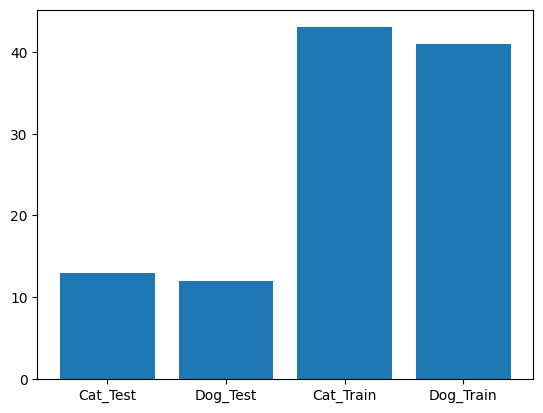

In [19]:
#Creating a plot to visualize the number of images in each set
labels = ["Cat_Test","Dog_Test","Cat_Train","Dog_Train"]
counts = [len(Cat_test_ds),len(Dog_test_ds),len(Cat_train_ds),len(Dog_train_ds)]
plt.bar(x=labels,height =counts)

In [20]:
#Displaying sample images from the cat data
plt.figure(figsize=(4, 4))
def print_images(ds,num):
    for images,labels in ds.take(1):
        for i in range(num):
            ax = plt.subplot(math.ceil(num/3), 3, i + 1)
            plt.imshow(np.array(images[i]).astype("uint8"))
            plt.axis("off")

<Figure size 400x400 with 0 Axes>

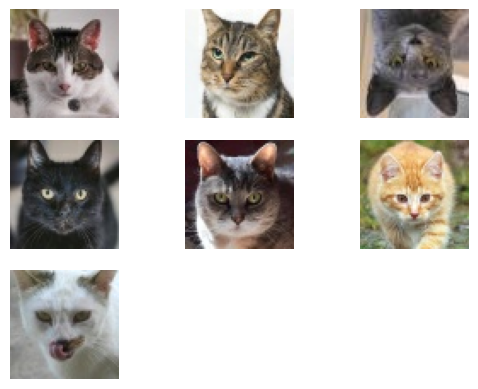

In [21]:
print_images(Cat_train_ds,7)

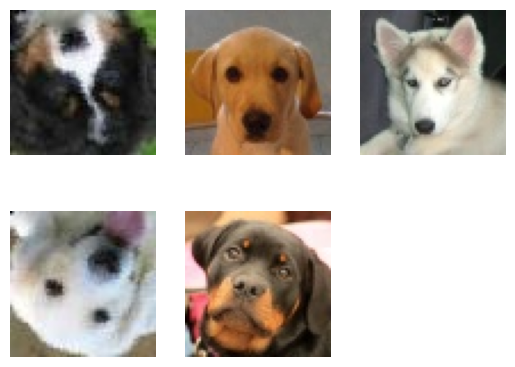

In [23]:
#Displaying sample images from the dog dataset
print_images(Dog_train_ds,5)

In [24]:
#Combining and shuffling the training dataset
training = Dog_train_ds.concatenate(Cat_train_ds)
training = training.shuffle(buffer_size=1000, seed=1337, reshuffle_each_iteration=True)

In [25]:
#Combinging and shuffling the testing dataset
testing = Dog_test_ds.concatenate(Cat_test_ds)
testing = testing.shuffle(buffer_size=1000, seed=1337, reshuffle_each_iteration=True)

In [26]:
#Combining and shuffling the validation dataset
val = Cat_val.concatenate(Dog_val)
val = val.shuffle(buffer_size=1000, seed=1337, reshuffle_each_iteration=True)

In [27]:
#Importing VGG16 and speciifying image parameters
INPUT_SIZE = 64
vgg16 = VGG16(include_top = False, weights = 'imagenet',input_shape=(INPUT_SIZE,INPUT_SIZE,3))

In [28]:
#Freezing previous layers
for layer in vgg16.layers:
    layer.trainable=False

In [29]:
# Adding a flattening layer and a dense layer
input_ = vgg16.input
output_=vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1,activation ='sigmoid')(last_layer)
model = Model(inputs=input_, outputs = last_layer)

In [30]:
#Specifying model parameters
BATCH_SIZE = 16
STEPS_PER_EPOCH = 200
EPOCHS = 3

In [31]:
#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])

In [32]:
#Fitting the model with the training data
model.fit_generator(training, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose =1)

Epoch 1/3


<ipython-input-32-7a734c3c29de>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose =1)


 84/200 [===========>..................] - ETA: 11:48 - loss: 0.4421 - accuracy: 0.9828

200/200 [==============================] - 517s 3s/step - loss: 0.4421 - accuracy: 0.9828


In [ ]:
#Evaluating the model with testing data
score = model.evaluate(testing, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [36]:
#Further model evaluation with validation data
val_loss, val_acc = model.evaluate(val)
print("Validation Loss: {:.3f}, Validation Accuracy: {:.3f}".format(val_loss, val_acc))

10/10 [==============================] - 76s 7s/step - loss: 3.4544e-18 - accuracy: 1.0000
Validation Loss: 0.000, Validation Accuracy: 1.000


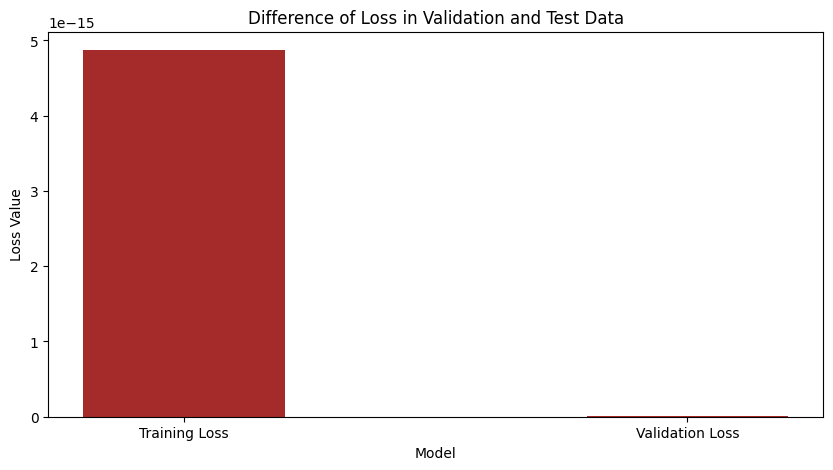

In [39]:
#Creating a plot to show loss and validation loss
data = {'Training Loss': score[0], 'Validation Loss': val_loss}
fig = plt.figure(figsize = (10, 5))
models = list(data.keys())
loss = list(data.values())

plt.bar(models, loss, color ='brown',
        width = 0.4)

plt.title('Difference of Loss in Validation and Test Data')
plt.xlabel('Model')
plt.ylabel('Loss Value')

plt.show()